<div style="background-color:#0a2b45; color:white; padding:25px; border-radius:10px; 
            text-align:center; font-family:'Segoe UI', sans-serif;">

  <h1 style="margin-bottom:8px;">Amazing International Airlines Inc. ✈️</h1>
  <h3 style="margin-top:0; font-style:italic; font-weight:normal; color:#aad8e6;">
    Fuzzy Clustering Implementation
  </h3>

  <hr style="width:60%; border:1px solid #2fa6c9; margin:15px auto;">

  <p style="margin:5px 0; font-size:15px;">
    <b>Group 4</b> - Data Mining Project (2025/2026)
  </p>
  <p style="margin:0; font-size:13px; color:#b5c6d0;">
    Master in Data Science and Advanced Analytics - Nova Information Management School
  </p>
</div>

<br>

<div style="background-color:#132e3e; color:#e2e8f0; padding:15px 20px; border-left:5px solid #2fa6c9; 
            border-radius:6px; font-family:'Segoe UI', sans-serif; font-size:14px;">

  <b>👩‍💻 Project Authors</b><br>
  Pedro Santos - 20250399 - <a href="mailto:20250399@novaims.unl.pt" style="color:#80d0e0;">20250399@novaims.unl.pt</a><br>
  Miguel Correia - 20250381 - <a href="mailto:20250381@novaims.unl.pt" style="color:#80d0e0;">20250381@novaims.unl.pt</a><br>
  Pedro Fernandes - 20250418 - <a href="mailto:20250418@novaims.unl.pt" style="color:#80d0e0;">20250418@novaims.unl.pt</a><br>
  Tiago Duarte - 20250360 - <a href="mailto:20250360@novaims.unl.pt" style="color:#80d0e0;">20250360@novaims.unl.pt</a>
</div>

<div style="text-align:right; font-size:12px; color:#9ca3af;">
  Last updated: January 2026
</div>


# 0. Importing Libraries and Loading data

In [1]:
# Core scientific computing
import numpy as np
import pandas as pd

# Fuzzy logic
import skfuzzy as fuzz

# Hierarchical clustering (merging the perspectives)
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Visualization (static)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization (interactive)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Reproducibility
np.random.seed(42)

In [2]:
df = pd.read_csv('../data/data_preprocessed.csv')
pd.set_option('display.max_columns', None) #To be able too see all columns
df.set_index('Loyalty#', inplace=True)
df.head()

,Province or State,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,Customer Lifetime Value,EnrollmentType,IsActive,Tenure,TotalFlights,TotalFlightsWithCompanions,TotalPointsAccumulated,TotalPointsRedeemed,RedeemRatio,flights_period1,flights_period2,flights_period3,avg_monthly_flights,seasonality_score,trend%
Loyalty#,,,,,,,,,,,,,,,,,,,,,,
123928,Quebec,male,Bachelor,Rural,-0.973912,Divorced,Star,-0.603743,Standard,True,-1.470114,0,-1.507944,0.00,-0.99401,-0.996412,0,-1.298282,-1.509618,-1.749105,-1.465181,-0.236183
857845,Newfoundland,male,College,Suburban,-0.415536,Single,Nova,-0.764430,Standard,True,-1.470114,196,-0.207219,39169.57,-0.99401,-0.996412,94,0.760586,1.215710,0.732332,-0.128213,0.046845
948961,Ontario,male,Bachelor,Urban,2.007348,Married,Nova,0.173430,Standard,True,-1.470114,0,-1.507944,0.00,-0.99401,-0.996412,0,-1.298282,-1.509618,-1.749105,-1.465181,-0.236183
647393,Quebec,male,College,Rural,-0.158062,Married,Nova,0.279391,Standard,True,-1.470114,0,-1.507944,0.00,-0.99401,-0.996412,0,-1.298282,-1.509618,-1.749105,-1.465181,-0.236183
170982,Quebec,male,High School or Below,Rural,-1.614595,Divorced,Nova,2.183354,Standard,True,-1.470114,0,-1.507944,0.00,-0.99401,-0.996412,0,-1.298282,-1.509618,-1.749105,-1.465181,-0.236183


# 1. Perspectives Definition

In [3]:
behavioral_features = [
    'Tenure', 
    'avg_monthly_flights', 
    'seasonality_score', 
    'trend%',
    'TotalFlightsWithCompanions',
    'flights_period2',
    'flights_period3'
]
df_behaviour = df[behavioral_features].copy()
df_behaviour.head(10)

,Tenure,avg_monthly_flights,seasonality_score,trend%,TotalFlightsWithCompanions,flights_period2,flights_period3
Loyalty#,,,,,,,
123928,-1.470114,-1.749105,-1.465181,-0.236183,-1.507944,-1.298282,-1.509618
857845,-1.470114,0.732332,-0.128213,0.046845,-0.207219,0.760586,1.215710
948961,-1.470114,-1.749105,-1.465181,-0.236183,-1.507944,-1.298282,-1.509618
647393,-1.470114,-1.749105,-1.465181,-0.236183,-1.507944,-1.298282,-1.509618
170982,-1.470114,-1.749105,-1.465181,-0.236183,-1.507944,-1.298282,-1.509618
253412,-1.470114,-1.749105,-1.465181,-0.236183,-1.507944,-1.298282,-1.509618
881871,-1.470114,-0.039603,0.016760,-0.012648,-0.880008,-0.629150,-0.454652
460711,-1.470114,-1.749105,-1.465181,-0.236183,-1.507944,-1.298282,-1.509618
408170,-1.470114,-1.749105,-1.465181,-0.236183,-1.507944,-1.298282,-1.509618


In [4]:
value_features = [
    'Income',
    'Customer Lifetime Value',
    'TotalPointsRedeemed',
    'RedeemRatio'
]
df_value = df[value_features].copy()
df_value.head(10)

,Income,Customer Lifetime Value,TotalPointsRedeemed,RedeemRatio
Loyalty#,,,,
123928,-0.973912,-0.603743,-0.994010,-0.996412
857845,-0.415536,-0.764430,-0.994010,-0.996412
948961,2.007348,0.173430,-0.994010,-0.996412
647393,-0.158062,0.279391,-0.994010,-0.996412
170982,-1.614595,2.183354,-0.994010,-0.996412
253412,1.350414,-1.094422,-0.994010,-0.996412
881871,1.087992,-0.967860,0.112632,-0.160147
460711,-1.005838,-0.491496,-0.994010,-0.996412
408170,-0.905023,1.734116,-0.994010,-0.996412


# 2. Behaviour-based Segmentation

Behavioral data shape: (16687, 7)

Testing different parameter combinations...
This takes a while. Please wait...

Calculations complete!


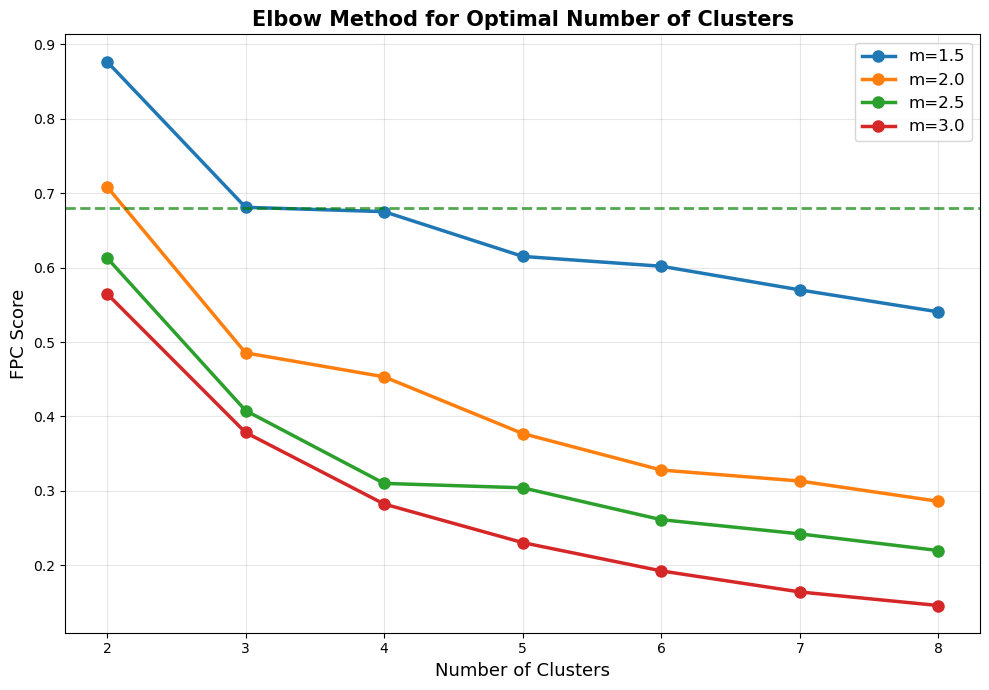

In [5]:
print(f"Behavioral data shape: {df_behaviour.shape}")

# Parameter ranges to test
cluster_range = range(2, 9)  # Test from 2 to 8 clusters (like we did on kmeans on the main notebook)
m_values = [1.5, 2.0, 2.5, 3.0]  # Different fuzziness levels

# Fixed parameters
error = 1e-5
maxiter = 1000

# Store results
results = []

print("\nTesting different parameter combinations...")
print("This takes a while. Please wait...\n")

# Test all combinations (silently)
for n_clusters in cluster_range:
    for m in m_values:
        # Prepare data - transpose for FCM
        X_transposed = df_behaviour.values.T
        
        # Perform FCM
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X_transposed,
            c=n_clusters,
            m=m,
            error=error,
            maxiter=maxiter,
            init=None
        )
        
        # Store results
        results.append({
            'n_clusters': n_clusters,
            'm': m,
            'fpc': fpc
        })

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)

print("="*60)
print("Calculations complete!")
print("="*60)

# Plot elbow curve
fig, ax = plt.subplots(figsize=(10, 7))

for m_val in m_values:
    subset = results_df[results_df['m'] == m_val]
    ax.plot(subset['n_clusters'], subset['fpc'], marker='o', label=f'm={m_val:.1f}', 
            linewidth=2.5, markersize=8)

ax.set_xlabel('Number of Clusters', fontsize=13)
ax.set_ylabel('FPC Score', fontsize=13)
ax.set_title('Elbow Method for Optimal Number of Clusters', fontsize=15, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.axhline(y=0.68, color='green', linestyle='--', linewidth=2, alpha=0.68, label='Good separation threshold')

plt.tight_layout()
plt.show()

Using the elbow method, it can be concluded that the best parameters are m=1.5 and number of clusters=3 or 4. Since number of clusters=3 has a higher FPC Score than 4, K=3 is the way to go. These parameters are going to be applied to the final FCM.

In [6]:
# Apply final FCM with optimal parameters

# FCM Parameters
n_clusters = 3      # Number of clusters to create (based on elbow method analysis)
m = 1.5             # Fuzziness parameter: lower values (1.5) = crisper clusters, higher values (3.0) = fuzzier clusters. Also based on the plot above
error = 1e-5        # Stopping criterion: 0.00001 is a good balance between precision and computational time
maxiter = 1000      # Maximum iterations: prevents infinite loops, 1000 is usually more than enough for convergence

print("Applying Fuzzy C-Means with optimal parameters")
print(f"Clusters: {n_clusters}, m: {m}")
print("="*60)

# Prepare data
X_transposed = df_behaviour.values.T

# Perform FCM
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_transposed,
    c=n_clusters,
    m=m,
    error=error,
    maxiter=maxiter,
    init=None
)

# Assign hard clusters
hard_clusters = np.argmax(u, axis=0)
max_membership = np.max(u, axis=0)

# Add to DataFrame
df['fcm_cluster_behavioral'] = hard_clusters
df['fcm_membership_behavioral'] = max_membership

# Also save the full membership matrix for analysis
for i in range(n_clusters):
    df[f'fcm_prob_cluster{i}_behavioral'] = u[i, :]

# Print summary
print(f"\nFuzzy Partition Coefficient (FPC): {fpc:.4f}")

# Cluster centers
print(f"\nCluster Centers:")
centers_df = pd.DataFrame(cntr, columns=behavioral_features, 
                          index=[f'Cluster {i}' for i in range(n_clusters)])
print(centers_df.round(3))

# Cluster distribution
unique, counts = np.unique(hard_clusters, return_counts=True)
print(f"\nCluster Distribution:")
for cluster_id, count in zip(unique, counts):
    percentage = (count / len(hard_clusters)) * 100
    print(f"  Cluster {cluster_id}: {count:,} points ({percentage:.1f}%)")

# Membership strength analysis
print(f"\nMembership Strength Analysis:")
print(f"  Mean membership: {max_membership.mean():.4f}")
print(f"  Median membership: {np.median(max_membership):.4f}")
strong_pct = (max_membership > 0.8).sum()/len(max_membership)*100
moderate_pct = ((max_membership >= 0.6) & (max_membership <= 0.8)).sum()/len(max_membership)*100
weak_pct = (max_membership < 0.6).sum()/len(max_membership)*100

print(f"  Strong membership (>0.8): {(max_membership > 0.8).sum():,} points ({strong_pct:.1f}%)")
print(f"  Moderate membership (0.6-0.8): {((max_membership >= 0.6) & (max_membership <= 0.8)).sum():,} points ({moderate_pct:.1f}%)")
print(f"  Weak membership (<0.6): {(max_membership < 0.6).sum():,} points ({weak_pct:.1f}%)")

print("\n" + "="*60)
print("Results saved to DataFrame!")
print("="*60)

Applying Fuzzy C-Means with optimal parameters
Clusters: 3, m: 1.5

Fuzzy Partition Coefficient (FPC): 0.6809

Cluster Centers:
           Tenure  avg_monthly_flights  seasonality_score  trend%  \
Cluster 0   0.582                0.837             -0.328  -0.156   
Cluster 1  -0.996               -1.297              0.551   0.031   
Cluster 2   0.208                0.218             -0.103  -0.021   

           TotalFlightsWithCompanions  flights_period2  flights_period3  
Cluster 0                       0.800            0.810            0.689  
Cluster 1                      -1.124           -0.959           -1.015  
Cluster 2                       0.115           -0.037            0.129  

Cluster Distribution:
  Cluster 0: 6,075 points (36.4%)
  Cluster 1: 4,943 points (29.6%)
  Cluster 2: 5,669 points (34.0%)

Membership Strength Analysis:
  Mean membership: 0.7747
  Median membership: 0.7983
  Strong membership (>0.8): 8,299 points (49.7%)
  Moderate membership (0.6-0.8): 5,498 p

Cluster Centers:
                         Tenure  avg_monthly_flights  seasonality_score  \
cluster_labels_behavior                                                   
0                         0.600                0.895             -0.347   
1                        -0.935               -1.336              0.515   
2                         0.180                0.213             -0.077   

                         trend%  TotalFlightsWithCompanions  flights_period2  \
cluster_labels_behavior                                                        
0                        -0.178                       0.862            0.882   
1                         0.069                      -1.158           -0.992   
2                         0.005                       0.091           -0.075   

                         flights_period3  
cluster_labels_behavior                   
0                                  0.740  
1                                 -1.048  
2                                 

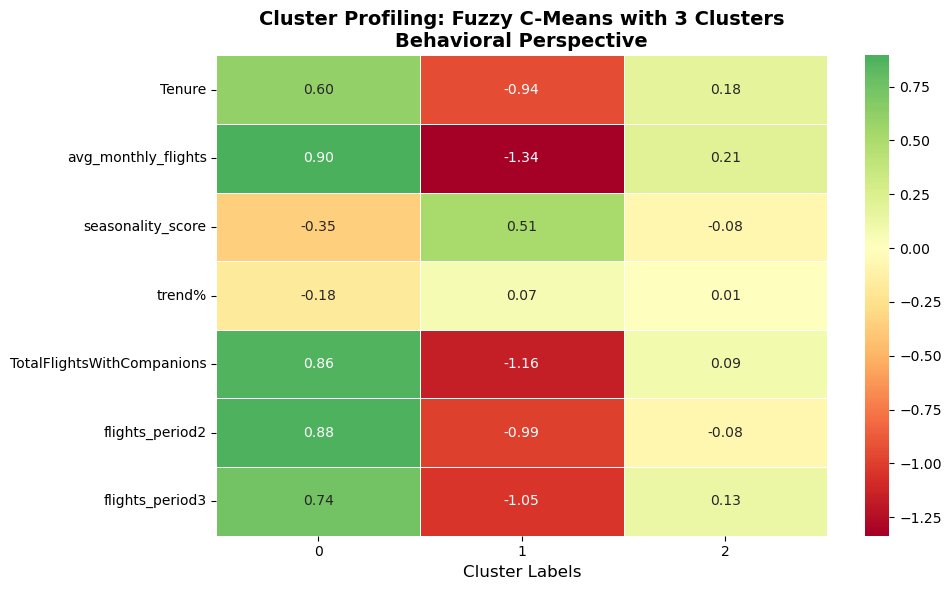

In [7]:
# Create DataFrame with FCM results
df_behavior_FCM_clusters = df_behaviour.copy()
df_behavior_FCM_clusters['cluster_labels_behavior'] = hard_clusters
df_behavior_FCM_clusters['membership_strength'] = max_membership

# Cluster means
cluster_fcm_behavior = df_behavior_FCM_clusters[behavioral_features + ['cluster_labels_behavior']].groupby('cluster_labels_behavior').mean()

# Cluster distribution
cluster_pct = (
    df_behavior_FCM_clusters["cluster_labels_behavior"]
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .round(2)
)

cluster_dist = pd.DataFrame({
    "count": df_behavior_FCM_clusters["cluster_labels_behavior"].value_counts().sort_index(),
    "pct_%": cluster_pct
})

print("Cluster Centers:")
print(cluster_fcm_behavior.round(3))
print("\nCluster Distribution:")
print(cluster_dist)

# Heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cluster_fcm_behavior.T,
            center=0, annot=True, cmap="RdYlGn", fmt=".2f",
            linewidths=0.5,
            ax=ax)
ax.set_xlabel("Cluster Labels", fontsize=12)
ax.set_title("Cluster Profiling: Fuzzy C-Means with 3 Clusters\nBehavioral Perspective", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Cluster 0: Established High-Frequency Engaged Travelers (36.41%)**
* **Characteristics:**
   * **Tenure**: +0.60 (high) -> Established customers
   * **avg_monthly_flights**: +0.90 (high) -> High flight frequency
   * **seasonality_score**: -0.35 (low) -> Consistent year-round travel
   * **trend%**: -0.18 (slightly negative) -> Mature, stable engagement
   * **TotalFlightsWithCompanions**: +0.86 (high) -> Frequent group or family travel
   * **flights_period2/3**: +0.88 / +0.74 (high) -> Sustained activity
* **Profile:** Core customer segment with high engagement. Established and frequent travelers, stable revenue contributors with strong companion travel behavior.

**Cluster 1: Low-Activity Seasonal or Dormant Customers (29.62%)**
* **Characteristics:**
   * **Tenure**: -0.94 (very low) -> Relatively new customers
   * **avg_monthly_flights**: -1.34 (very low) -> Minimal flight activity
   * **seasonality_score**: +0.52 (moderate-high) -> Seasonal travel patterns
   * **trend%**: +0.07 (slightly positive) -> Early signs of reactivation
   * **TotalFlightsWithCompanions**: -1.16 (very low) -> Predominantly solo travelers
   * **flights_period2/3**: -0.99 / -1.05 (very low) -> Consistently minimal activity
* **Profile:** Low-engagement segment with sporadic, season-driven usage. Customers are mostly inactive but show limited recovery potential through targeted seasonal or reactivation campaigns.

**Cluster 2: Stable Low-Intensity Regular Travelers (33.97%)**
* **Characteristics:**
   * **Tenure**: +0.18 (slightly positive) -> Moderately established customers
   * **avg_monthly_flights**: +0.21 (low-moderate) -> Regular but low-intensity usage
   * **seasonality_score**: -0.08 (low) -> No strong seasonal pattern
   * **trend%**: +0.01 (stable) -> Flat and consistent engagement
   * **TotalFlightsWithCompanions**: +0.09 (low) -> Mixed solo and accompanied travel
   * **flights_period2/3**: -0.08 / +0.13 (near zero) -> Stable activity over time
* **Profile:** Stable segment of regular but infrequent travelers. Predictable behavior, limited intensity, and moderate long-term value.

**Key Insights:**
1. **Cluster 0** (36.41%) represents the highest-value behavioral segment with frequent, consistent, and accompanied travel.
2. **Cluster 1** (29.62%) captures a low-activity, seasonal segment with latent reactivation potential.
3. **Cluster 2** (33.97%) forms a stable base of low-intensity users with predictable engagement.
4. The fuzzy clustering approach provides nuanced customer assignment, supported by a solid FPC value (0.6809).


Membership Strength by Cluster:
                           mean  median     min     max
cluster_labels_behavior                                
0                        0.7679  0.7896  0.4555  0.9998
1                        0.8529  0.8747  0.3716  1.0000
2                        0.7139  0.7107  0.3596  0.9982


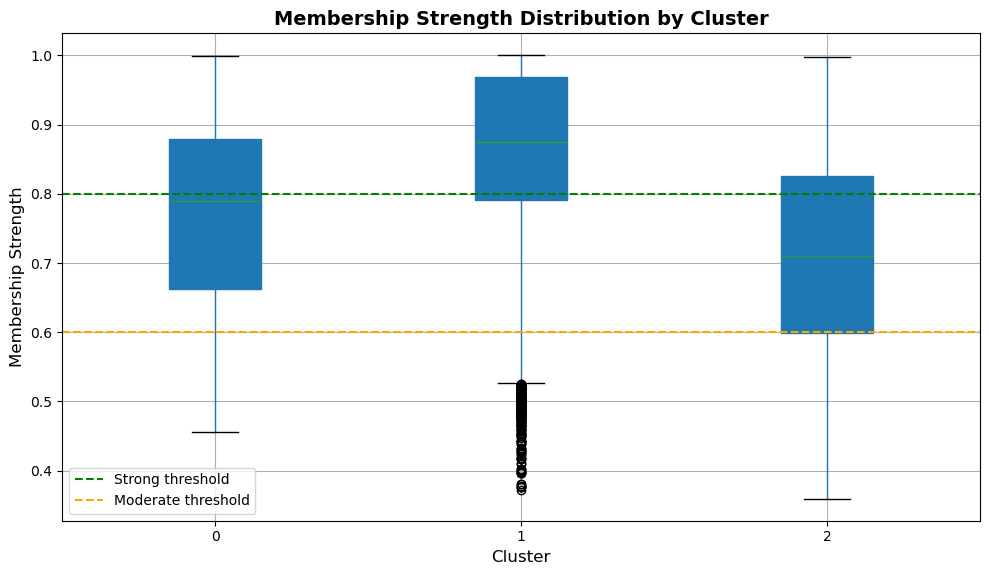

In [8]:
# Membership strength by cluster
membership_analysis = df_behavior_FCM_clusters.groupby('cluster_labels_behavior')['membership_strength'].agg(['mean', 'median', 'min', 'max'])
print("\nMembership Strength by Cluster:")
print(membership_analysis.round(4))

# Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
df_behavior_FCM_clusters.boxplot(column='membership_strength', 
                                  by='cluster_labels_behavior',
                                  ax=ax,
                                  patch_artist=True)
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Membership Strength', fontsize=12)
ax.set_title('Membership Strength Distribution by Cluster', fontsize=14, fontweight='bold')
plt.suptitle('')
ax.axhline(y=0.8, color='green', linestyle='--', label='Strong threshold')
ax.axhline(y=0.6, color='orange', linestyle='--', label='Moderate threshold')
ax.legend()
plt.tight_layout()
plt.show()

Strong membership across all clusters validates the 3-cluster solution:
- **Cluster 0** (mean: 0.77) -> Well-defined cluster, with most customers clearly aligned to this behavioral pattern, though some overlap remains.
- **Cluster 1** (mean: 0.85) -> Very strong separation, indicating a distinct and cohesive core segment.
- **Cluster 2** (mean: 0.71) -> Good overall definition, but with more overlap, suggesting a higher presence of customers transitioning between moderate and low-intensity behavioral states.

Minimum membership values (~0.36-0.46) indicate a small subset of boundary cases -> customers with mixed behavioral patterns who do not fit cleanly into a single segment. These customers may benefit from hybrid targeting strategies that reflect their transitional behavior.

# 3. Value-based Segmentation

Value data shape: (16687, 4)

Testing different parameter combinations...
This takes a while. Please wait...

Calculations complete!


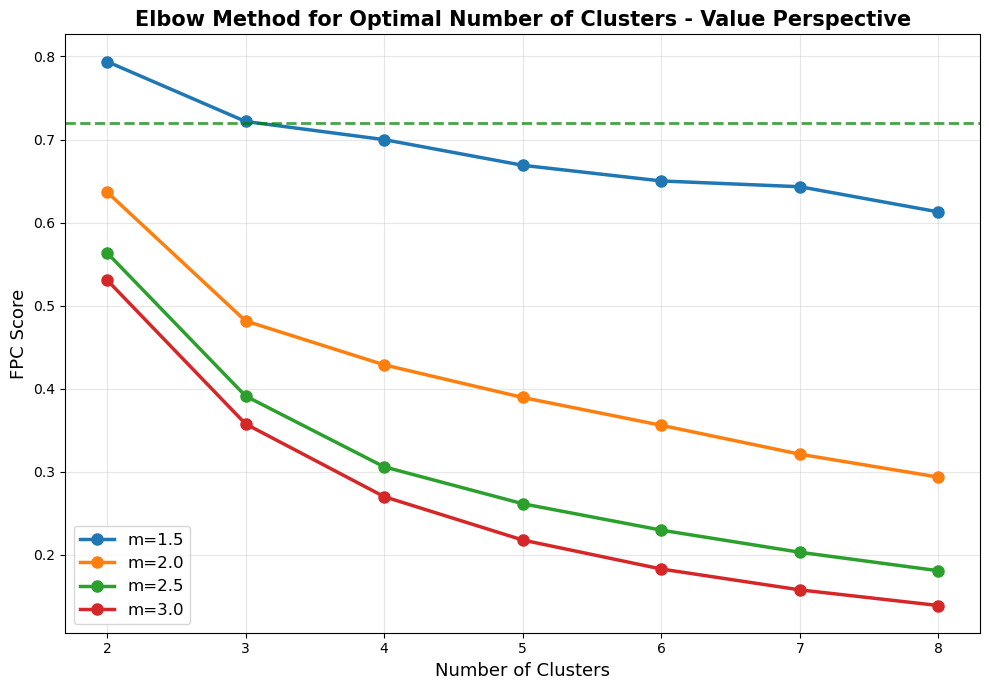

In [9]:
print(f"Value data shape: {df_value.shape}")

# Parameter ranges to test
cluster_range = range(2, 9)  # Test from 2 to 8 clusters (like we did on kmeans on the main notebook)
m_values = [1.5, 2.0, 2.5, 3.0]  # Different fuzziness levels

# Fixed parameters
error = 1e-5
maxiter = 1000

# Store results
results_value = []

print("\nTesting different parameter combinations...")
print("This takes a while. Please wait...\n")

# Test all combinations (silently)
for n_clusters in cluster_range:
    for m in m_values:
        # Prepare data - transpose for FCM
        X_transposed = df_value.values.T
        
        # Perform FCM
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X_transposed,
            c=n_clusters,
            m=m,
            error=error,
            maxiter=maxiter,
            init=None
        )
        
        # Store results
        results_value.append({
            'n_clusters': n_clusters,
            'm': m,
            'fpc': fpc
        })

# Convert to DataFrame for easier analysis
results_value_df = pd.DataFrame(results_value)

print("="*60)
print("Calculations complete!")
print("="*60)

# Plot elbow curve
fig, ax = plt.subplots(figsize=(10, 7))

for m_val in m_values:
    subset = results_value_df[results_value_df['m'] == m_val]
    ax.plot(subset['n_clusters'], subset['fpc'], marker='o', label=f'm={m_val:.1f}', 
            linewidth=2.5, markersize=8)

ax.set_xlabel('Number of Clusters', fontsize=13)
ax.set_ylabel('FPC Score', fontsize=13)
ax.set_title('Elbow Method for Optimal Number of Clusters - Value Perspective', fontsize=15, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.axhline(y=0.72, color='green', linestyle='--', linewidth=2, alpha=0.72, label='Good separation threshold')

plt.tight_layout()
plt.show()

In [10]:
# Apply final FCM with optimal parameters
# FCM Parameters
n_clusters = 3      # Number of clusters to create (based on elbow method analysis)
m = 1.5             # Fuzziness parameter: lower values (1.5) = crisper clusters, higher values (3.0) = fuzzier clusters. Also based on the plot above
error = 1e-5        # Stopping criterion: 0.00001 is a good balance between precision and computational time
maxiter = 1000      # Maximum iterations: prevents infinite loops, 1000 is usually more than enough for convergence

print("Applying Fuzzy C-Means with optimal parameters")
print(f"Clusters: {n_clusters}, m: {m}")
print("="*60)

# Prepare data
X_transposed = df_value.values.T

# Perform FCM
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_transposed,
    c=n_clusters,
    m=m,
    error=error,
    maxiter=maxiter,
    init=None
)

# Assign hard clusters
hard_clusters = np.argmax(u, axis=0)
max_membership = np.max(u, axis=0)

# Add to DataFrame
df['fcm_cluster_value'] = hard_clusters
df['fcm_membership_value'] = max_membership

# Also save the full membership matrix for analysis
for i in range(n_clusters):
    df[f'fcm_prob_cluster{i}_value'] = u[i, :]

# Print summary
print(f"\nFuzzy Partition Coefficient (FPC): {fpc:.4f}")

# Cluster centers
print(f"\nCluster Centers:")
centers_df = pd.DataFrame(cntr, columns=value_features, 
                          index=[f'Cluster {i}' for i in range(n_clusters)])
print(centers_df.round(3))

# Cluster distribution
unique, counts = np.unique(hard_clusters, return_counts=True)
print(f"\nCluster Distribution:")
for cluster_id, count in zip(unique, counts):
    percentage = (count / len(hard_clusters)) * 100
    print(f"  Cluster {cluster_id}: {count:,} points ({percentage:.1f}%)")

# Membership strength analysis
print(f"\nMembership Strength Analysis:")
print(f"  Mean membership: {max_membership.mean():.4f}")
print(f"  Median membership: {np.median(max_membership):.4f}")
strong_pct = (max_membership > 0.8).sum()/len(max_membership)*100
moderate_pct = ((max_membership >= 0.6) & (max_membership <= 0.8)).sum()/len(max_membership)*100
weak_pct = (max_membership < 0.6).sum()/len(max_membership)*100

print(f"  Strong membership (>0.8): {(max_membership > 0.8).sum():,} points ({strong_pct:.1f}%)")
print(f"  Moderate membership (0.6-0.8): {((max_membership >= 0.6) & (max_membership <= 0.8)).sum():,} points ({moderate_pct:.1f}%)")
print(f"  Weak membership (<0.6): {(max_membership < 0.6).sum():,} points ({weak_pct:.1f}%)")

print("\n" + "="*60)
print("Results saved to DataFrame!")
print("="*60)

Applying Fuzzy C-Means with optimal parameters
Clusters: 3, m: 1.5

Fuzzy Partition Coefficient (FPC): 0.6955

Cluster Centers:
           Income  Customer Lifetime Value  TotalPointsRedeemed  RedeemRatio
Cluster 0   0.891                    0.243               -0.437       -0.441
Cluster 1  -0.093                   -0.091                1.197        1.141
Cluster 2  -0.665                   -0.250               -0.556       -0.559

Cluster Distribution:
  Cluster 0: 5,235 points (31.4%)
  Cluster 1: 5,122 points (30.7%)
  Cluster 2: 6,330 points (37.9%)

Membership Strength Analysis:
  Mean membership: 0.7859
  Median membership: 0.8280
  Strong membership (>0.8): 9,074 points (54.4%)
  Moderate membership (0.6-0.8): 4,370 points (26.2%)
  Weak membership (<0.6): 3,243 points (19.4%)

Results saved to DataFrame!


Cluster Centers:
                      Income  Customer Lifetime Value  TotalPointsRedeemed  \
cluster_labels_value                                                         
0                      0.961                    0.280               -0.451   
1                     -0.083                   -0.040                1.155   
2                     -0.727                   -0.201               -0.560   

                      RedeemRatio  
cluster_labels_value               
0                          -0.472  
1                           1.191  
2                          -0.576  

Cluster Distribution:
                      count  pct_%
cluster_labels_value              
0                      5235  31.37
1                      5122  30.69
2                      6330  37.93


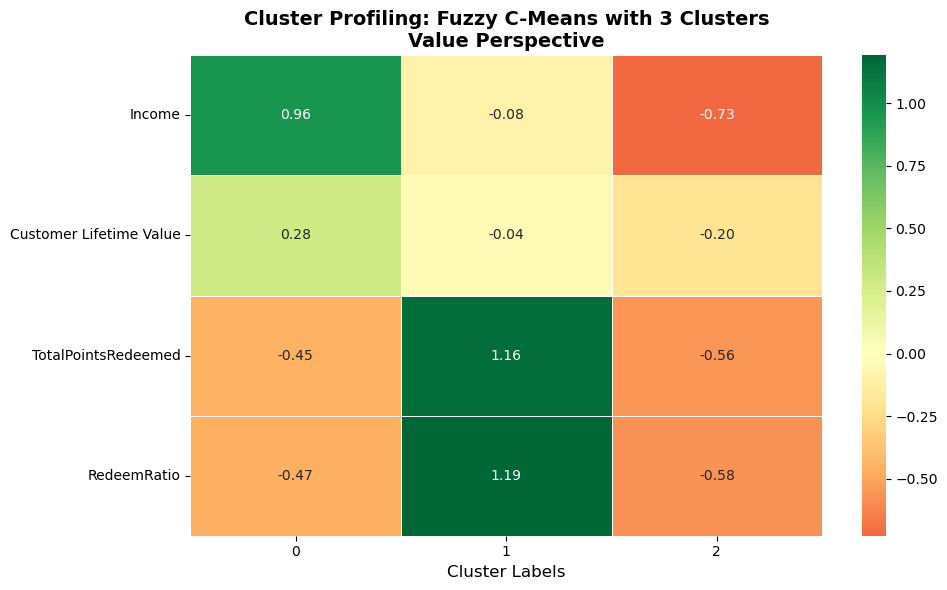

In [11]:
# Create DataFrame with FCM results
df_value_FCM_clusters = df_value.copy()
df_value_FCM_clusters['cluster_labels_value'] = hard_clusters
df_value_FCM_clusters['membership_strength'] = max_membership

# Cluster means
cluster_fcm_value = df_value_FCM_clusters[value_features + ['cluster_labels_value']].groupby('cluster_labels_value').mean()

# Cluster distribution
cluster_pct = (
    df_value_FCM_clusters["cluster_labels_value"]
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .round(2)
)

cluster_dist = pd.DataFrame({
    "count": df_value_FCM_clusters["cluster_labels_value"].value_counts().sort_index(),
    "pct_%": cluster_pct
})

print("Cluster Centers:")
print(cluster_fcm_value.round(3))
print("\nCluster Distribution:")
print(cluster_dist)

# Heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cluster_fcm_value.T,
            center=0, annot=True, cmap="RdYlGn", fmt=".2f",
            linewidths=0.5,
            ax=ax)
ax.set_xlabel("Cluster Labels", fontsize=12)
ax.set_title("Cluster Profiling: Fuzzy C-Means with 3 Clusters\nValue Perspective", 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Cluster 0: Premium High-Income Low-Redeemers (31.37%)**
* **Characteristics:**
   * **Income**: +0.96 (very high) -> Highest income segment
   * **Customer Lifetime Value**: +0.28 (moderate-high) -> Solid revenue contributors
   * **TotalPointsRedeemed**: -0.45 (low) -> Limited loyalty program usage
   * **RedeemRatio**: -0.47 (low) -> Conservative point redemption behavior
* **Profile:** Affluent customers with strong economic potential but modest engagement with the loyalty program. Despite low redemption activity, their solid CLV suggests relatively price-insensitive behavior, likely prioritizing convenience and service over rewards. Premium segment best retained through VIP treatment, exclusive services, and non-points-based benefits.

**Cluster 1: Active Loyalty Program Enthusiasts (30.69%)**
* **Characteristics:**
   * **Income**: -0.08 (average) -> Close to population mean
   * **Customer Lifetime Value**: -0.04 (average) -> Moderate economic contribution
   * **TotalPointsRedeemed**: +1.16 (very high) -> Intensive loyalty program usage
   * **RedeemRatio**: +1.19 (very high) -> Extremely active point redemption
* **Profile:** Highly engaged loyalty users with strong affinity to the rewards program. While not the highest-income group, they actively extract value from points and benefits. This segment responds well to loyalty-driven incentives and represents a key target for upselling and retention through reward-based offers.

**Cluster 2: Low-Value Low-Engagement Customers (37.93%)**
* **Characteristics:**
   * **Income**: -0.73 (low) -> Below-average income
   * **Customer Lifetime Value**: -0.20 (low) -> Limited economic contribution
   * **TotalPointsRedeemed**: -0.56 (very low) -> Minimal loyalty program usage
   * **RedeemRatio**: -0.58 (very low) -> Rare point redemption
* **Profile:** Budget-oriented customers with low economic value and minimal engagement with the loyalty ecosystem. Largest segment by volume, representing a baseline revenue tier. Monetization potential is limited, but selective activation or simplified offers may help increase participation.

**Key Insights:**
1. **Cluster 0** (31.37%) represents the **premium income segment** -> Best retained through exclusive services rather than reward-heavy incentives.
2. **Cluster 1** (30.69%) demonstrates **strong loyalty program engagement** -> Ideal target for points-based cross-selling and retention strategies.
3. **Cluster 2** (37.93%) reflects a **low-value, low-engagement base** -> Activation efforts should be selective and cost-efficient.
4. The fuzzy clustering solution shows good separation (FPC = 0.6955), supporting targeted value-based strategies across distinct customer tiers.


Membership Strength by Cluster:
                        mean  median     min  max
cluster_labels_value                             
0                     0.7612  0.7884  0.3414  1.0
1                     0.7793  0.8220  0.3414  1.0
2                     0.8118  0.8887  0.3449  1.0


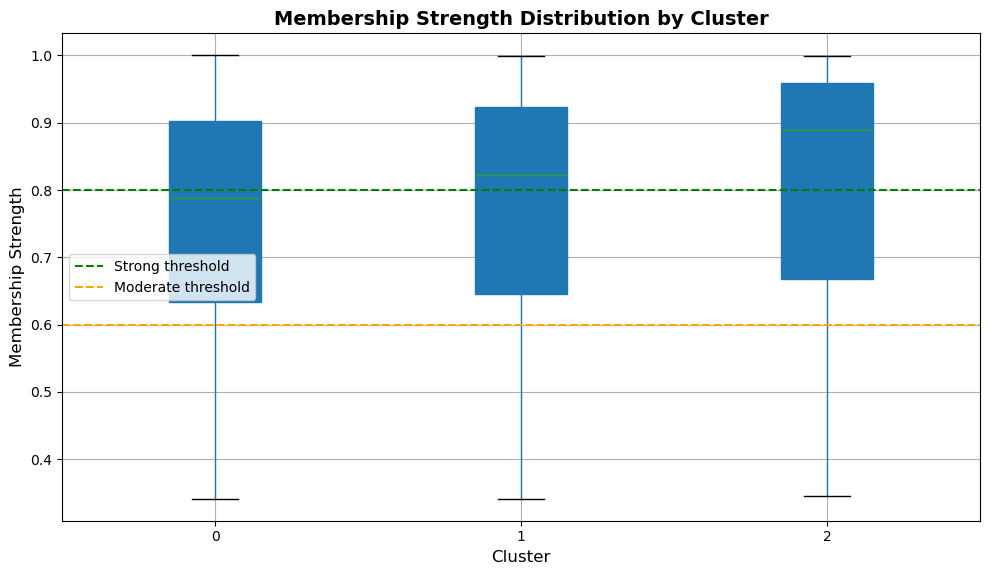

In [12]:
# Membership strength by cluster
membership_analysis = df_value_FCM_clusters.groupby('cluster_labels_value')['membership_strength'].agg(['mean', 'median', 'min', 'max'])
print("\nMembership Strength by Cluster:")
print(membership_analysis.round(4))

# Boxplot
fig, ax = plt.subplots(figsize=(10, 6))
df_value_FCM_clusters.boxplot(column='membership_strength', 
                               by='cluster_labels_value',
                               ax=ax,
                               patch_artist=True)
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Membership Strength', fontsize=12)
ax.set_title('Membership Strength Distribution by Cluster', fontsize=14, fontweight='bold')
plt.suptitle('')
ax.axhline(y=0.8, color='green', linestyle='--', label='Strong threshold')
ax.axhline(y=0.6, color='orange', linestyle='--', label='Moderate threshold')
ax.legend()
plt.tight_layout()
plt.show()

Moderate to strong membership across all value clusters, with some variation in confidence:
- **Cluster 0** (mean: 0.76) -> Good separation, with moderate overlap with adjacent value segments.
- **Cluster 1** (mean: 0.78) -> Good separation, with moderate overlap with adjacent value segments.
- **Cluster 2** (mean: 0.81) -> Strongest membership, loyalty-focused customers form a cohesive and clearly identifiable group.

Minimum membership values (~0.34) indicate boundary cases -> customers exhibiting mixed value characteristics who do not fit cleanly into a single segment. These intermediate profiles may benefit from hybrid targeting strategies that combine elements from adjacent value tiers.

# 4. Merging

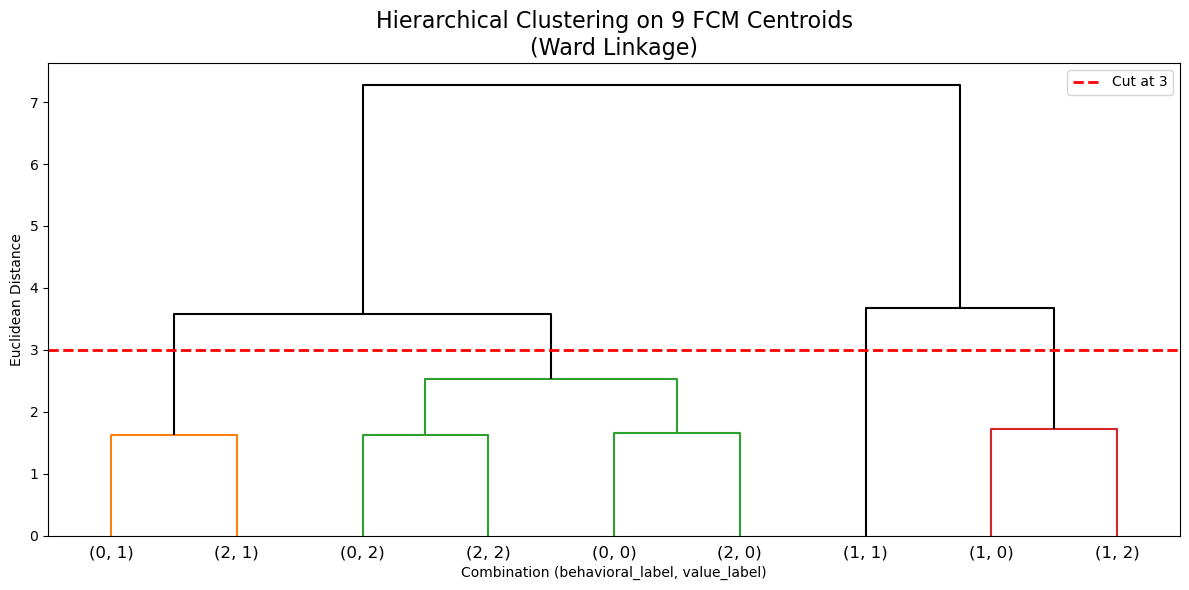

In [13]:
# Define metric features for analysis
metric_features = behavioral_features + value_features

# Create integrated segment identifier
df['integrated_segment'] = (
    'B' + df['fcm_cluster_behavioral'].astype(str) + 
    '_V' + df['fcm_cluster_value'].astype(str)
)

# Calculate centroids (means) for each cluster combination
df_fcm_centroids = df.groupby(
    ['fcm_cluster_behavioral', 'fcm_cluster_value']
)[metric_features].mean()

# Hierarchical clustering configuration
hclust = AgglomerativeClustering(
    linkage='ward',
    metric='euclidean',
    distance_threshold=0,
    n_clusters=None
)

# Fit hierarchical clustering on cluster centroids
hclust_labels = hclust.fit_predict(df_fcm_centroids)

# Calculate cluster sizes for dendrogram
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Build linkage matrix
linkage_matrix = np.column_stack([
    hclust.children_,
    hclust.distances_,
    counts
]).astype(float)

# Create labels
clean_labels = [(int(b), int(v)) for b, v in df_fcm_centroids.index]

# Plot dendrogram
fig = plt.figure(figsize=(12, 6))
y_threshold = 3

dendrogram(
    linkage_matrix,
    truncate_mode="level",
    labels=clean_labels,
    color_threshold=y_threshold,
    above_threshold_color='k'
)

plt.axhline(
    y=y_threshold,
    color='r',
    linestyle='--',
    linewidth=2,
    label=f'Cut at {y_threshold}'
)
plt.title(
    'Hierarchical Clustering on 9 FCM Centroids\n(Ward Linkage)',
    fontsize=16
)
plt.xlabel('Combination (behavioral_label, value_label)')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
# Apply hierarchical clustering with 4 final clusters
n_final_clusters = 4

hclust_final = AgglomerativeClustering(
    linkage='ward',
    n_clusters=n_final_clusters
)

hclust_final_labels = hclust_final.fit_predict(df_fcm_centroids)

# Add to centroids dataframe
df_fcm_centroids['merged_labels'] = hclust_final_labels

# Map merged labels to original dataframe
cluster_mapping = dict(zip(df_fcm_centroids.index, df_fcm_centroids['merged_labels']))

df['fcm_merged_labels'] = df.apply(
    lambda row: cluster_mapping[(row['fcm_cluster_behavioral'], row['fcm_cluster_value'])],
    axis=1
)

# Calculate final cluster sizes (silent)
merged_dist = df['fcm_merged_labels'].value_counts().sort_index()

# Calculate feature means by final cluster (silent)
final_profiles = df.groupby('fcm_merged_labels')[metric_features].mean()

print("Hierarchical merge complete: 9 combinations -> 4 final clusters")
print(f"Total customers: {len(df):,}")

Hierarchical merge complete: 9 combinations -> 4 final clusters
Total customers: 16,687


In [15]:
# Prepare combination data
value_labels = {
    0: 'Premium High-Income',
    1: 'Low-Value Non-Engagers',
    2: 'Loyalty Enthusiasts'
}

behavioral_labels = {
    0: 'Inactive Low-Engagement',
    1: 'Active Engaged',
    2: 'Seasonal Emerging'
}

combination_data = []
for behavioral in range(3):
    for value in range(3):
        count = len(df[(df['fcm_cluster_behavioral'] == behavioral) & 
                      (df['fcm_cluster_value'] == value)])
        if count > 0:
            combination_data.append({
                'behavioral': behavioral,
                'value': value,
                'count': count
            })

combo_df = pd.DataFrame(combination_data)

# Map each combination to final cluster
combo_df['final_cluster'] = combo_df.apply(
    lambda row: cluster_mapping[(row['behavioral'], row['value'])],
    axis=1
)

combo_df = combo_df.sort_values(['final_cluster', 'value', 'behavioral']).reset_index(drop=True)

# Final cluster sizes
final_cluster_sizes = combo_df.groupby('final_cluster')['count'].sum()

# Create combination node labels
combo_nodes = []
for idx, row in combo_df.iterrows():
    combo_label = (f"{behavioral_labels[row['behavioral']]} ×\n"
                   f"{value_labels[row['value']]}\n"
                   f"({row['count']:,} customers)")
    combo_nodes.append(combo_label)

# Create final cluster node labels
final_nodes = [f"Final Cluster {i}\n({final_cluster_sizes[i]:,} customers)" 
               for i in range(n_final_clusters)]

all_nodes = combo_nodes + final_nodes

# Define links
sources = []
targets = []
values = []
colors = []

for idx, row in combo_df.iterrows():
    sources.append(idx)
    targets.append(len(combo_nodes) + row['final_cluster'])
    values.append(row['count'])
    
    color_palette = [
        'rgba(231, 76, 60, 0.4)',
        'rgba(52, 152, 219, 0.4)',
        'rgba(46, 204, 113, 0.4)',
        'rgba(241, 196, 15, 0.4)'
    ]
    colors.append(color_palette[row['final_cluster']])

# Node colors
combo_node_colors = ['#95a5a6'] * len(combo_nodes)
final_node_colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
node_colors = combo_node_colors + final_node_colors

# Positions
x_positions = [0.0] * len(combo_nodes) + [1.0] * n_final_clusters
y_positions = (list(np.linspace(0.05, 0.95, len(combo_nodes))) + 
               list(np.linspace(0.20, 0.80, n_final_clusters)))

# Create Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=25,
        line=dict(color="white", width=2),
        label=all_nodes,
        color=node_colors,
        x=x_positions,
        y=y_positions
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    )
)])

fig.update_layout(
    title_text=f"FCM Hierarchical Merge: 9 Behavioral×Value Combinations -> {n_final_clusters} Final Clusters",
    font_size=11,
    height=700,
    width=1200
)

fig.show()

# 5. Profiling

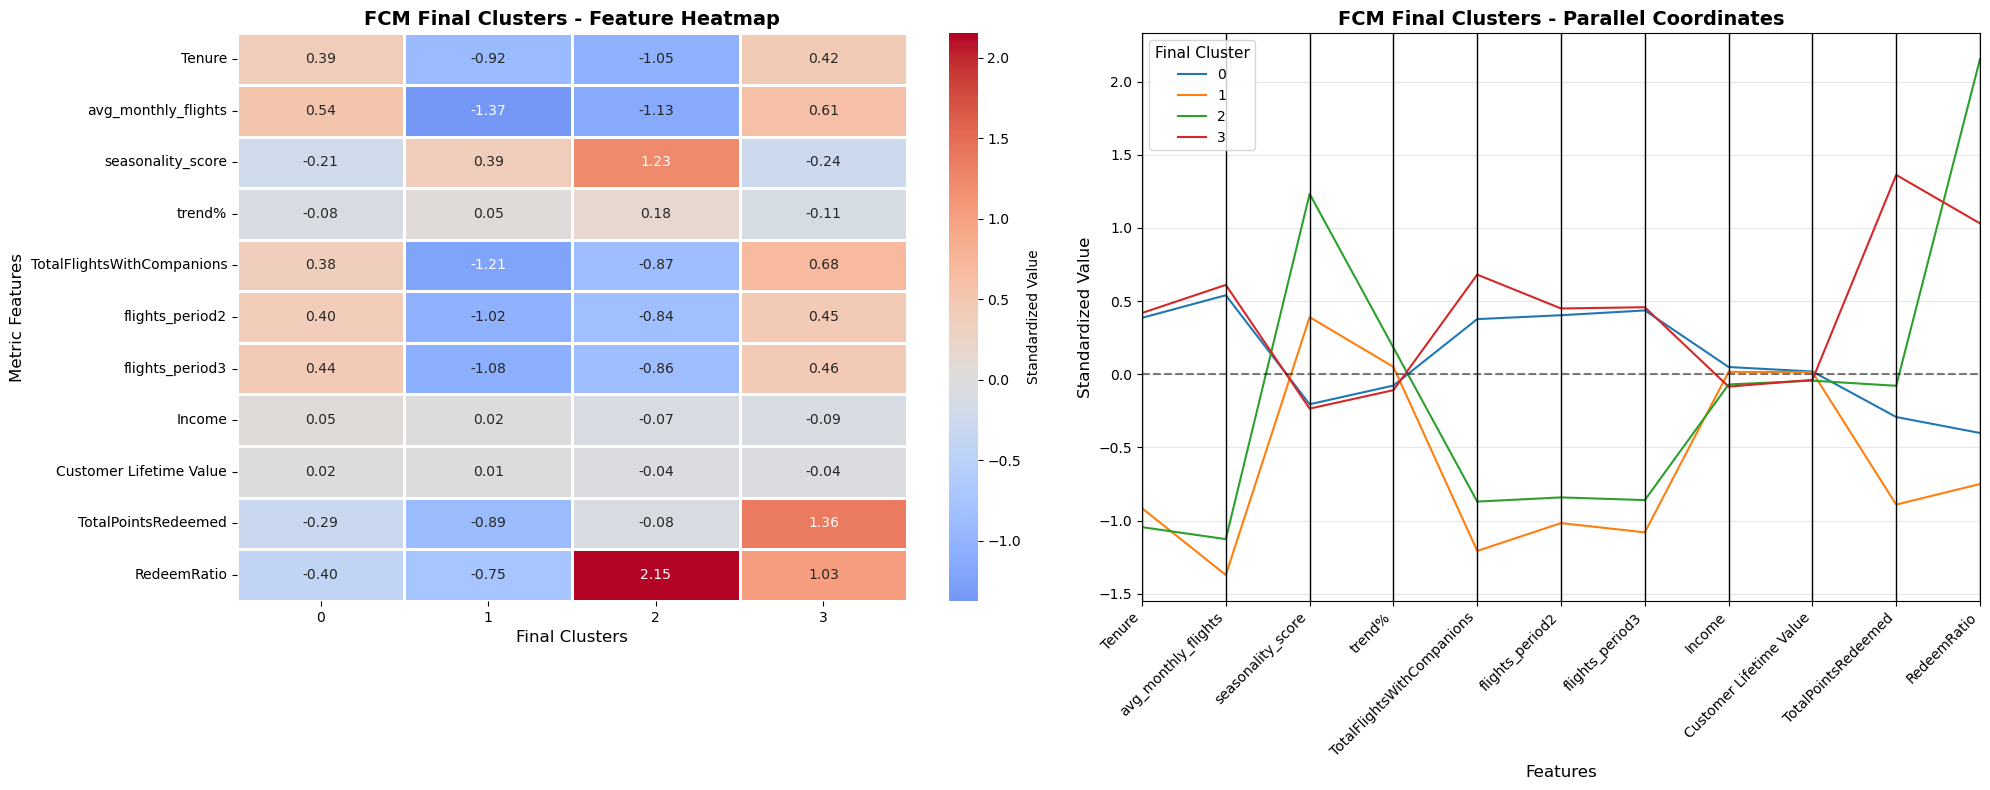

In [16]:
# Profile final merged clusters
all_segments = sorted(df['fcm_merged_labels'].unique())
df_fcm_final_centroids = df.groupby('fcm_merged_labels')[metric_features].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# LEFT: Heatmap
sns.heatmap(
    df_fcm_final_centroids.T,
    ax=ax1,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Standardized Value'}
)
ax1.set_title('FCM Final Clusters - Feature Heatmap', fontsize=14, fontweight='bold')
ax1.set_ylabel('Metric Features', fontsize=12)
ax1.set_xlabel('Final Clusters', fontsize=12)
ax1.grid(False)

# RIGHT: Parallel Coordinates
plt.sca(ax2)
pd.plotting.parallel_coordinates(
    df_fcm_final_centroids.reset_index(),
    'fcm_merged_labels',
    color=sns.color_palette('tab10', n_colors=len(all_segments)),
    ax=ax2
)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1.5)
ax2.set_title('FCM Final Clusters - Parallel Coordinates', fontsize=14, fontweight='bold')
ax2.set_ylabel('Standardized Value', fontsize=12)
ax2.set_xlabel('Features', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax2.legend(title='Final Cluster', loc='best', title_fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Final Cluster 0: Mixed Active Travelers (44.1% - 7,355 customers)**

**Profile:**
- Moderate activity (tenure +0.39, flights +0.54)
- Low seasonality (-0.21) = year-round travel
- Moderate companion travel (+0.38)
- Low loyalty redemption (-0.29, -0.40)
- Mixed value profiles across premium and low-value tiers

**Key Insight:** Largest segment. Stable, regular travelers who remain largely indifferent to loyalty mechanisms despite heterogeneous value potential.

**Strategy:** Standard retention, basic loyalty benefits, service-focused incentives rather than aggressive points schemes

---

**Final Cluster 1: Inactive Low-Activity (25.2% - 4,210 customers)**

**Profile:**
- **Low activity** (tenure -0.92, flights -1.37)
- Mild seasonality (+0.39)
- **Very low companion travel** (-1.21)
- Persistently low recent activity (-1.02, -1.08)
- **Very low loyalty redemption** (-0.89, -0.75)

**Key Insight:** Customers who never meaningfully activated. Low engagement is consistent across behavioral, temporal, and loyalty dimensions.

**Strategy:** Reactivation campaigns with clear value framing or acceptance of natural churn

---

**Final Cluster 2: Ultra Value Maximizers (4.4% - 733 customers)**

**Profile:**
- Low activity (tenure -1.05, flights -1.13)
- **Extreme seasonality (+1.23)**
- Low companion travel (-0.87)
- Below-average income and CLV (-0.07, -0.04)
- **Extreme redemption ratio (+2.15)** = maximizes every point despite low volume

**Key Insight:** Smallest and most distinct segment. Highly value-conscious seasonal travelers who aggressively optimize loyalty benefits when active.

**Strategy:** Points-based engagement, seasonal offers, gamification, and redemption-driven messaging

---

**Final Cluster 3: Loyalty Champions (26.3% - 4,389 customers)**

**Profile:**
- Moderate activity (tenure +0.42, flights +0.61)
- Low seasonality (-0.24)
- Moderate-to-high companion travel (+0.68)
- **High loyalty redemption (+1.36, +1.03)** = strong program engagement
- Slightly below-average income/CLV (-0.09, -0.04)

**Key Insight:** Second-largest segment. Active and consistent loyalty users whose engagement with rewards compensates for average economic profiles.

**Strategy:** Loyalty program expansion, point multipliers, companion-focused rewards, and personalized redemption incentives

---

**Strategic Summary:**
4 actionable segments balancing behavioral intensity, seasonality, and loyalty engagement while maintaining operational feasibility for AI-driven marketing teams.


# 6. Insights 

## 6.1 Membership degree analysis (a more in depth approach)

MEMBERSHIP DEGREE ANALYSIS

Behavioral Perspective:
  Strong assignments (>0.8): 8,299 (49.7%)
  Moderate assignments (0.6-0.8): 5,498 (32.9%)
  Weak assignments (<0.6): 2,890 (17.3%)

Value Perspective:
  Strong assignments (>0.8): 9,074 (54.4%)
  Moderate assignments (0.6-0.8): 4,370 (26.2%)
  Weak assignments (<0.6): 3,243 (19.4%)


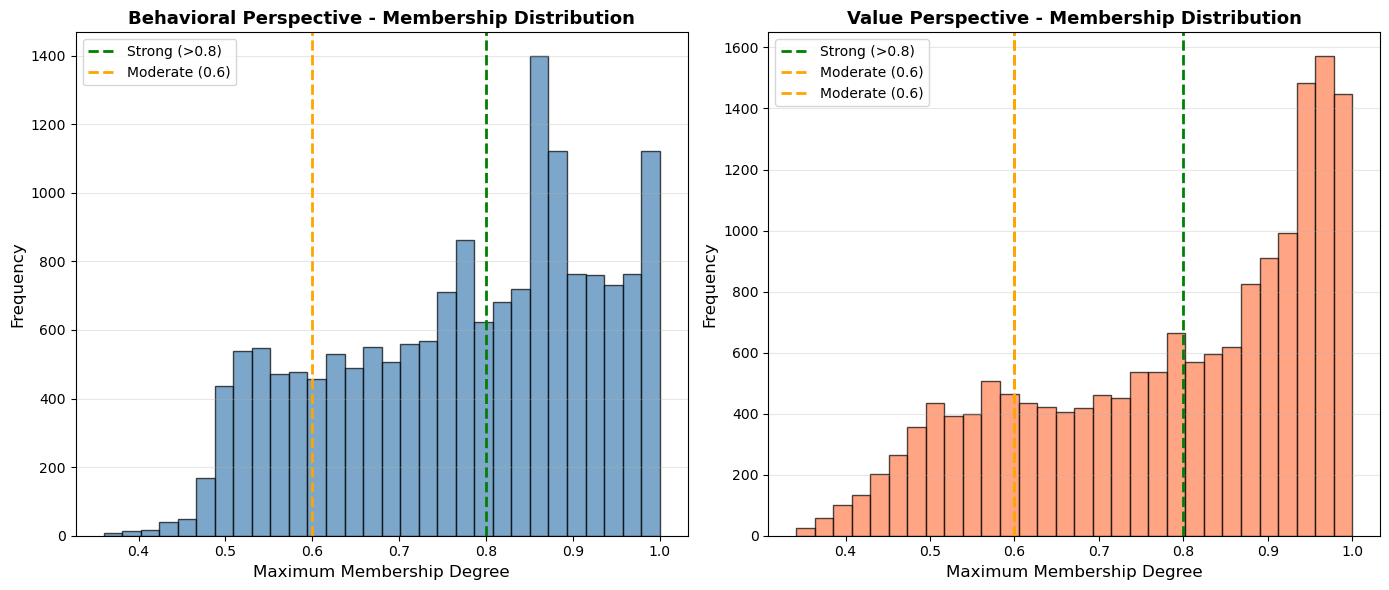

In [17]:
# Membership Degree Analysis
print("="*60)
print("MEMBERSHIP DEGREE ANALYSIS")
print("="*60)

# Analyze distribution of membership strengths
print("\nBehavioral Perspective:")
print(f"  Strong assignments (>0.8): {(df['fcm_membership_behavioral'] > 0.8).sum():,} ({(df['fcm_membership_behavioral'] > 0.8).sum()/len(df)*100:.1f}%)")
print(f"  Moderate assignments (0.6-0.8): {((df['fcm_membership_behavioral'] >= 0.6) & (df['fcm_membership_behavioral'] <= 0.8)).sum():,} ({((df['fcm_membership_behavioral'] >= 0.6) & (df['fcm_membership_behavioral'] <= 0.8)).sum()/len(df)*100:.1f}%)")
print(f"  Weak assignments (<0.6): {(df['fcm_membership_behavioral'] < 0.6).sum():,} ({(df['fcm_membership_behavioral'] < 0.6).sum()/len(df)*100:.1f}%)")

print("\nValue Perspective:")
print(f"  Strong assignments (>0.8): {(df['fcm_membership_value'] > 0.8).sum():,} ({(df['fcm_membership_value'] > 0.8).sum()/len(df)*100:.1f}%)")
print(f"  Moderate assignments (0.6-0.8): {((df['fcm_membership_value'] >= 0.6) & (df['fcm_membership_value'] <= 0.8)).sum():,} ({((df['fcm_membership_value'] >= 0.6) & (df['fcm_membership_value'] <= 0.8)).sum()/len(df)*100:.1f}%)")
print(f"  Weak assignments (<0.6): {(df['fcm_membership_value'] < 0.6).sum():,} ({(df['fcm_membership_value'] < 0.6).sum()/len(df)*100:.1f}%)")

# Visualize membership distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(df['fcm_membership_behavioral'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=0.8, color='green', linestyle='--', linewidth=2, label='Strong (>0.8)')
axes[0].axvline(x=0.6, color='orange', linestyle='--', linewidth=2, label='Moderate (0.6)')
axes[0].set_xlabel('Maximum Membership Degree', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Behavioral Perspective - Membership Distribution', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(df['fcm_membership_value'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(x=0.8, color='green', linestyle='--', linewidth=2, label='Strong (>0.8)')
axes[1].axvline(x=0.6, color='orange', linestyle='--', linewidth=2, label='Moderate (0.6)')
axes[1].axvline(x=0.6, color='orange', linestyle='--', linewidth=2, label='Moderate (0.6)')
axes[1].set_xlabel('Maximum Membership Degree', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Value Perspective - Membership Distribution', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Membership Degree Analysis**

**Assignment Confidence Distribution:**

**Behavioral Perspective:**
- Strong (>0.8): 8,299 (49.7%)
- Moderate (0.6–0.8): 5,498 (32.9%)
- Weak (<0.6): 2,890 (17.3%)

**Value Perspective:**
- Strong (>0.8): 9,073 (54.4%)
- Moderate (0.6–0.8): 4,371 (26.2%)
- Weak (<0.6): 3,243 (19.4%)

**Key Insights:**

**1. Natural Gradient**  
Around half of the customer base does not fit cleanly into a single segment. This confirms the presence of gradual transitions between profiles and validates the use of a fuzzy clustering approach over hard segmentation.

**2. Value > Behavioral**  
Value-based segmentation shows clearer separation than behavioral segmentation (54.4% vs. 49.7% strong assignments). Economic variables generate sharper boundaries than usage behavior alone.

**3. Transitional Customers**  
Between 17% and 19% of customers exhibit weak cluster assignments, indicating mixed or evolving profiles. These customers are likely transitioning between segments and represent a key opportunity for targeted, adaptive interventions.

**AIAI Strategy:**
- **Strong (50–54%)** -> Standard segment-level campaigns
- **Moderate (26–33%)** -> A/B testing, refinement of messaging, quarterly monitoring
- **Weak (17–19%)** -> Personalized strategies and predictive models to anticipate transition direction


## 6.2 Hard vs soft clustering interpretations


HARD VS SOFT CLUSTERING COMPARISON

Customers with significant secondary cluster membership (>0.3):
  Behavioral: 4,223 (25.3%)
  Value: 3,121 (18.7%)

Most Ambiguous Assignments (top 5):

Behavioral:
          fcm_prob_cluster0_behavioral  fcm_prob_cluster1_behavioral  \
Loyalty#                                                               
585271                           0.283                         0.358   
279380                           0.266                         0.372   
668136                           0.263                         0.376   
402251                           0.247                         0.377   
332077                           0.250                         0.377   

          fcm_prob_cluster2_behavioral  fcm_membership_behavioral  
Loyalty#                                                           
585271                           0.360                      0.360  
279380                           0.363                      0.372  
668136               

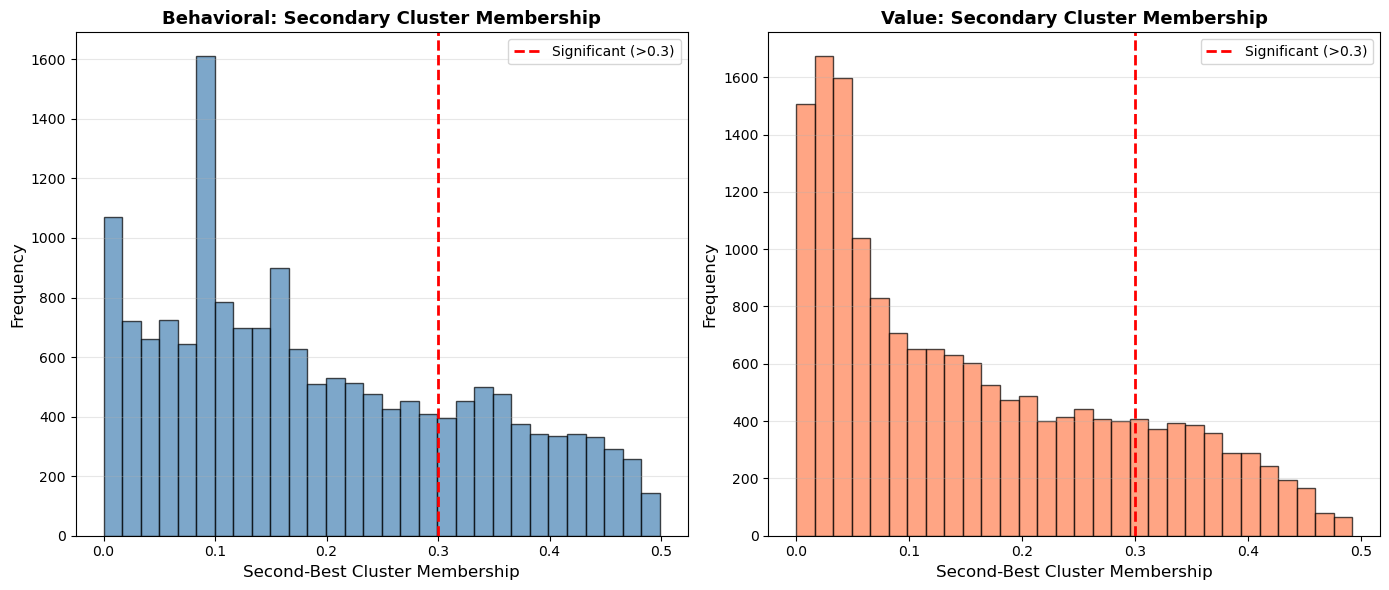

In [18]:
print("\n" + "="*60)
print("HARD VS SOFT CLUSTERING COMPARISON")
print("="*60)

# Prepare probability data
behavioral_probs = df[['fcm_prob_cluster0_behavioral', 
                       'fcm_prob_cluster1_behavioral', 
                       'fcm_prob_cluster2_behavioral',
                       'fcm_cluster_behavioral',
                       'fcm_membership_behavioral']].copy()

value_probs = df[['fcm_prob_cluster0_value', 
                  'fcm_prob_cluster1_value', 
                  'fcm_prob_cluster2_value',
                  'fcm_cluster_value',
                  'fcm_membership_value']].copy()

# Calculate second-best cluster membership
behavioral_probs['second_best'] = behavioral_probs[['fcm_prob_cluster0_behavioral', 
                                                     'fcm_prob_cluster1_behavioral', 
                                                     'fcm_prob_cluster2_behavioral']].apply(
    lambda row: sorted(row, reverse=True)[1], axis=1
)

value_probs['second_best'] = value_probs[['fcm_prob_cluster0_value', 
                                          'fcm_prob_cluster1_value', 
                                          'fcm_prob_cluster2_value']].apply(
    lambda row: sorted(row, reverse=True)[1], axis=1
)

# Count customers with significant secondary membership
print("\nCustomers with significant secondary cluster membership (>0.3):")
print(f"  Behavioral: {(behavioral_probs['second_best'] > 0.3).sum():,} ({(behavioral_probs['second_best'] > 0.3).sum()/len(df)*100:.1f}%)")
print(f"  Value: {(value_probs['second_best'] > 0.3).sum():,} ({(value_probs['second_best'] > 0.3).sum()/len(df)*100:.1f}%)")

# Show most ambiguous examples
print("\n" + "="*60)
print("Most Ambiguous Assignments (top 5):")
print("="*60)

print("\nBehavioral:")
print(behavioral_probs.sort_values('fcm_membership_behavioral').head(5)[['fcm_prob_cluster0_behavioral', 
                                                                           'fcm_prob_cluster1_behavioral',
                                                                           'fcm_prob_cluster2_behavioral',
                                                                           'fcm_membership_behavioral']].round(3))

print("\nValue:")
print(value_probs.sort_values('fcm_membership_value').head(5)[['fcm_prob_cluster0_value',
                                                                 'fcm_prob_cluster1_value', 
                                                                 'fcm_prob_cluster2_value',
                                                                 'fcm_membership_value']].round(3))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(behavioral_probs['second_best'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=0.3, color='red', linestyle='--', linewidth=2, label='Significant (>0.3)')
axes[0].set_xlabel('Second-Best Cluster Membership', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Behavioral: Secondary Cluster Membership', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(value_probs['second_best'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(x=0.3, color='red', linestyle='--', linewidth=2, label='Significant (>0.3)')
axes[1].set_xlabel('Second-Best Cluster Membership', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Value: Secondary Cluster Membership', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)

**Hard vs Soft Clustering Comparison**

**Secondary Cluster Membership (>0.3):**
- **Behavioral**: 4,223 customers (25.3%)
- **Value**: 3,122 customers (18.7%)

**Most Ambiguous Cases (these will be plotted in 6.3):**

**Behavioral Example:**
Customer with Loyalty# 585271: 28.3% C0, 35.8% C1, 36.0% C2 -> Nearly equal membership across all behavioral clusters

**Value Example:**
Customer with Loyalty# 116562: 33.0% C0, 34.1% C1, 32.8% C2 -> No dominant value segment

**Key Insights:**

**1. Significant Overlap**  
25.3% of customers in behavioral clustering and 18.7% in value clustering show meaningful membership in two or more clusters. Hard clustering would impose arbitrary single-cluster assignments for these cases.

**2. True Ambiguity**  
The most ambiguous customers consistently exhibit balanced memberships (~33–37%) across clusters, indicating genuinely hybrid profiles rather than noise or outliers.

**3. Behavioral More Fluid**  
Behavioral clustering shows 6.6% more secondary memberships than value clustering, confirming that usage patterns are more transitional and dynamic than underlying economic characteristics.

**AIAI Implications:**

- **25.3% Behavioral Overlap** -> Deploy gradual engagement strategies instead of binary active/inactive classification.
- **18.7% Value Overlap** -> Apply flexible loyalty benefits that scale with behavior rather than rigid tier thresholds.
- **Hard clustering limitation** -> Traditional methods such as K-Means would force these ambiguous customers into single segments, removing nuance that is critical for personalized, adaptive marketing strategies.


## 6.3 Customer Overlap between Segments


CUSTOMER OVERLAP BETWEEN SEGMENTS

Behavioral Perspective - Multi-Cluster Membership:
  1 cluster only: 12,464 (74.7%)
  2 clusters: 4,223 (25.3%)
  3 clusters: 0 (0.0%)

Value Perspective - Multi-Cluster Membership:
  1 cluster only: 13,566 (81.3%)
  2 clusters: 3,088 (18.5%)
  3 clusters: 33 (0.2%)

Transitional Customer Summary:
  Behavioral transitional: 4,223
  Value transitional: 3,121
  Both perspectives: 793 (4.8%)


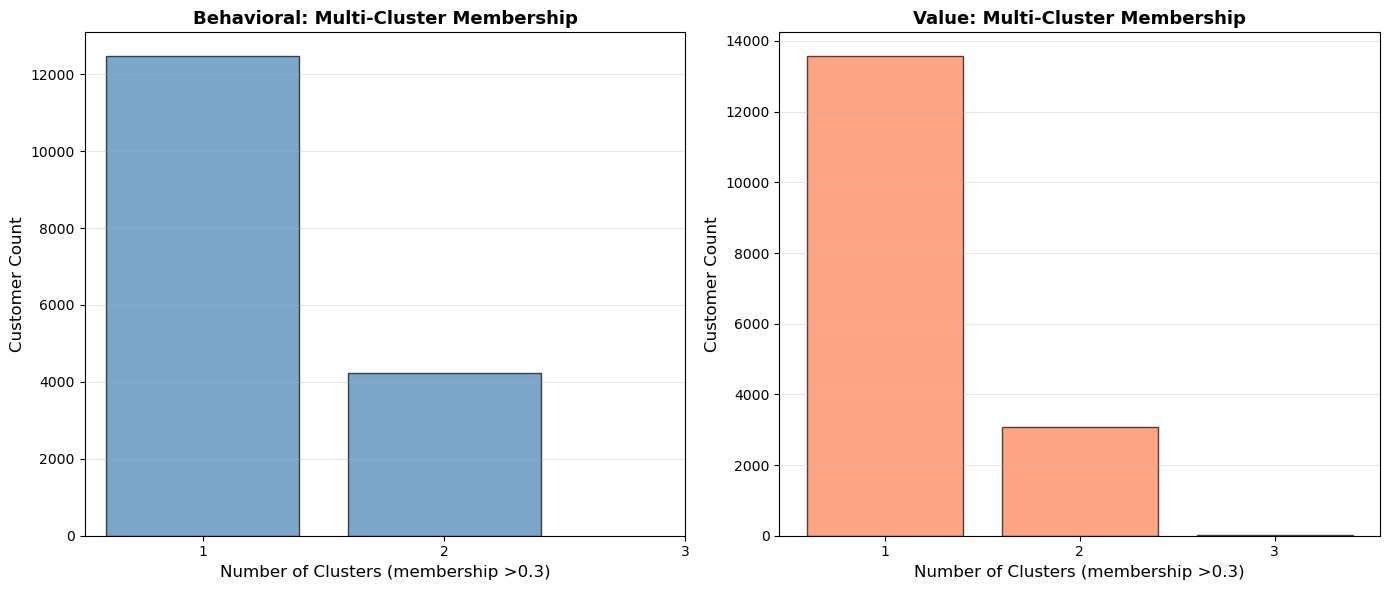

In [19]:
print("\n" + "="*60)
print("CUSTOMER OVERLAP BETWEEN SEGMENTS")
print("="*60)

# Define threshold for significant membership
threshold = 0.3

# Count significant memberships per customer
def count_significant_memberships(row, threshold=0.3):
    return (row > threshold).sum()

behavioral_multi = df[['fcm_prob_cluster0_behavioral', 
                       'fcm_prob_cluster1_behavioral', 
                       'fcm_prob_cluster2_behavioral']].apply(count_significant_memberships, axis=1)

value_multi = df[['fcm_prob_cluster0_value', 
                  'fcm_prob_cluster1_value', 
                  'fcm_prob_cluster2_value']].apply(count_significant_memberships, axis=1)

print("\nBehavioral Perspective - Multi-Cluster Membership:")
print(f"  1 cluster only: {(behavioral_multi == 1).sum():,} ({(behavioral_multi == 1).sum()/len(df)*100:.1f}%)")
print(f"  2 clusters: {(behavioral_multi == 2).sum():,} ({(behavioral_multi == 2).sum()/len(df)*100:.1f}%)")
print(f"  3 clusters: {(behavioral_multi == 3).sum():,} ({(behavioral_multi == 3).sum()/len(df)*100:.1f}%)")

print("\nValue Perspective - Multi-Cluster Membership:")
print(f"  1 cluster only: {(value_multi == 1).sum():,} ({(value_multi == 1).sum()/len(df)*100:.1f}%)")
print(f"  2 clusters: {(value_multi == 2).sum():,} ({(value_multi == 2).sum()/len(df)*100:.1f}%)")
print(f"  3 clusters: {(value_multi == 3).sum():,} ({(value_multi == 3).sum()/len(df)*100:.1f}%)")

# Identify transitional customers
behavioral_transitional = df[behavioral_multi >= 2].copy()
value_transitional = df[value_multi >= 2].copy()
both_transitional = set(behavioral_transitional.index) & set(value_transitional.index)

print("\n" + "="*60)
print("Transitional Customer Summary:")
print(f"  Behavioral transitional: {len(behavioral_transitional):,}")
print(f"  Value transitional: {len(value_transitional):,}")
print(f"  Both perspectives: {len(both_transitional):,} ({len(both_transitional)/len(df)*100:.1f}%)")
print("="*60)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

behavioral_dist = behavioral_multi.value_counts().sort_index()
axes[0].bar(behavioral_dist.index, behavioral_dist.values, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Number of Clusters (membership >0.3)', fontsize=12)
axes[0].set_ylabel('Customer Count', fontsize=12)
axes[0].set_title('Behavioral: Multi-Cluster Membership', fontsize=13, fontweight='bold')
axes[0].set_xticks([1, 2, 3])
axes[0].grid(axis='y', alpha=0.3)

value_dist = value_multi.value_counts().sort_index()
axes[1].bar(value_dist.index, value_dist.values, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Number of Clusters (membership >0.3)', fontsize=12)
axes[1].set_ylabel('Customer Count', fontsize=12)
axes[1].set_title('Value: Multi-Cluster Membership', fontsize=13, fontweight='bold')
axes[1].set_xticks([1, 2, 3])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Customer Overlap Between Segments**

**Multi-Cluster Membership:**

**Behavioral:**
- 1 cluster: 12,464 (74.7%)
- 2 clusters: 4,223 (25.3%)
- 3 clusters: 0 (0.0%)

**Value:**
- 1 cluster: 13,565 (81.3%)
- 2 clusters: 3,089 (18.5%)
- 3 clusters: 33 (0.2%)

**Transitional:**
- Behavioral only: 4,223
- Value only: 3,122
- Both perspectives: 794 (4.8%)

**Key Insights:**

**1. Clean Segmentation**  
0% of customers in the behavioral perspective and only 0.2% in the value perspective span all three clusters. This confirms that the three-cluster solution produces well-defined and largely distinct segment boundaries.

**2. Behavioral 6.8% More Overlap**  
Dual-cluster membership is higher for behavioral segmentation (25.3%) than for value segmentation (18.5%), reinforcing that behavioral patterns are more fluid and transitional than underlying economic characteristics.

**3. Dual-Transitional Customers (794 customers, 4.8%)**  
A small but critical group is simultaneously transitional in both behavioral and value dimensions.

**AIAI Strategy:**
- **74–81%** -> Standard segment-level campaigns
- **18–25%** -> Hybrid strategies with periodic monitoring
- **4.8% dual-transitional** -> Predictive models and manual review for high-value or high-risk cases


In [20]:
# Side-by-side ternary plots
fig = make_subplots(
    rows=1,
    cols=2,
    specs=[[{'type': 'ternary'}, {'type': 'ternary'}]],
    subplot_titles=(
        'Fuzzy Membership Distribution – Behavioral Perspective',
        'Fuzzy Membership Distribution – Value Perspective'
    ),
    horizontal_spacing=0.10
)

# Behavioral memberships
fig.add_trace(
    go.Scatterternary(
        mode='markers',
        a=df['fcm_prob_cluster0_behavioral'],
        b=df['fcm_prob_cluster1_behavioral'],
        c=df['fcm_prob_cluster2_behavioral'],
        marker=dict(
            color=df['fcm_cluster_behavioral'],
            size=3,
            opacity=0.4,
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(
                title='Hard Cluster',
                x=0.46,
                y=0.5,
                len=0.8
            )
        ),
        showlegend=False
    ),
    row=1, col=1
)

# Value memberships
fig.add_trace(
    go.Scatterternary(
        mode='markers',
        a=df['fcm_prob_cluster0_value'],
        b=df['fcm_prob_cluster1_value'],
        c=df['fcm_prob_cluster2_value'],
        marker=dict(
            color=df['fcm_cluster_value'],
            size=3,
            opacity=0.4,
            colorscale='Plasma',
            showscale=True,
            colorbar=dict(
                title='Hard Cluster',
                x=1.08,
                y=0.5,
                len=0.8
            )
        ),
        showlegend=False
    ),
    row=1, col=2
)

# Layout and axis settings
fig.update_layout(
    ternary=dict(
        sum=1,
        aaxis=dict(title='Cluster 0', min=0),
        baxis=dict(title='Cluster 1', min=0),
        caxis=dict(title='Cluster 2', min=0)
    ),
    ternary2=dict(
        sum=1,
        aaxis=dict(title='Cluster 0', min=0),
        baxis=dict(title='Cluster 1', min=0),
        caxis=dict(title='Cluster 2', min=0)
    ),
    title=dict(
        text='Fuzzy Membership Distributions – Behavioral vs Value Perspectives',
        x=0.01,
        xanchor='left'
    ),
    height=600,
    width=1300,
    margin=dict(l=50, r=180, t=90, b=40)
)

fig.show()

The ternary plots show that fuzzy membership is not concentrated solely at the cluster vertices. A large share of customers lies along edges and within the interior of the simplex, indicating **partial membership across multiple clusters** and the presence of transition zones rather than rigid segment boundaries.

Behavioral clusters display a clearer core with structured transition regions, reflecting gradual shifts between inactive and engaged states. In contrast, value-based clusters are more dispersed, revealing weaker alignment between income, lifetime value, and loyalty behavior. Together, these patterns confirm that fuzzy clustering captures customer heterogeneity and overlap more effectively than hard segmentation.

In [21]:
behavior_loyalty_id = 585271
value_loyalty_id = 116562 

df_behavior_customer = df.loc[[behavior_loyalty_id]]
df_value_customer = df.loc[[value_loyalty_id]]

fig = make_subplots(
    rows=1,
    cols=2,
    specs=[[{'type': 'ternary'}, {'type': 'ternary'}]],
    horizontal_spacing=0.12
)

# Behavioral space (background)
fig.add_trace(
    go.Scatterternary(
        mode='markers',
        a=df['fcm_prob_cluster0_behavioral'],
        b=df['fcm_prob_cluster1_behavioral'],
        c=df['fcm_prob_cluster2_behavioral'],
        marker=dict(size=3, opacity=0.2, color='lightgrey'),
        showlegend=False
    ),
    row=1, col=1
)

# Behavioral highlighted customer
fig.add_trace(
    go.Scatterternary(
        mode='markers',
        a=df_behavior_customer['fcm_prob_cluster0_behavioral'],
        b=df_behavior_customer['fcm_prob_cluster1_behavioral'],
        c=df_behavior_customer['fcm_prob_cluster2_behavioral'],
        marker=dict(size=14, color='red'),
        showlegend=False
    ),
    row=1, col=1
)

# Value space (background)
fig.add_trace(
    go.Scatterternary(
        mode='markers',
        a=df['fcm_prob_cluster0_value'],
        b=df['fcm_prob_cluster1_value'],
        c=df['fcm_prob_cluster2_value'],
        marker=dict(size=3, opacity=0.2, color='lightgrey'),
        showlegend=False
    ),
    row=1, col=2
)

# Value highlighted customer
fig.add_trace(
    go.Scatterternary(
        mode='markers',
        a=df_value_customer['fcm_prob_cluster0_value'],
        b=df_value_customer['fcm_prob_cluster1_value'],
        c=df_value_customer['fcm_prob_cluster2_value'],
        marker=dict(size=14, color='red'),
        showlegend=False
    ),
    row=1, col=2
)

fig.update_layout(
    ternary=dict(
        sum=1,
        aaxis=dict(title='Cluster 0'),
        baxis=dict(title='Cluster 1'),
        caxis=dict(title='Cluster 2')
    ),
    ternary2=dict(
        sum=1,
        aaxis=dict(title='Cluster 0'),
        baxis=dict(title='Cluster 1'),
        caxis=dict(title='Cluster 2')
    ),
    annotations=[
        dict(
            text=f'Behavioral Fuzzy Position – Customer {behavior_loyalty_id}',
            x=0.22, y=1.12, xref='paper', yref='paper',
            showarrow=False, font=dict(size=13)
        ),
        dict(
            text=f'Value Fuzzy Position – Customer {value_loyalty_id}',
            x=0.78, y=1.12, xref='paper', yref='paper',
            showarrow=False, font=dict(size=13)
        )
    ],
    title=dict(
        text='Individual Customer Positions in Behavioral and Value Fuzzy Spaces',
        x=0.01,
        xanchor='left'
    ),
    height=600,
    width=1200,
    margin=dict(t=120),
    showlegend=False
)

fig.show()

These highlighted customers correspond to the **top-ranked cases within the “Most Ambiguous Assignments” (Top 5)** identified by the fuzzy clustering analysis. In both the behavioral and value spaces, their membership degrees are distributed almost evenly across the three clusters, with each cluster accounting for roughly one third of the total membership.

Although a hard clustering label is still assigned to each customer, this assignment does not fully reflect their underlying profile. Rather than belonging clearly to a single segment, these customers simultaneously exhibit characteristics associated with multiple clusters.

This ambiguity illustrates a key limitation of hard segmentation approaches, which force complex and hybrid customer profiles into discrete categories. By contrast, fuzzy clustering explicitly captures this uncertainty, enabling a more faithful representation of customer heterogeneity and supporting cautious, flexible interpretation at the individual level.

## 6.4 Uncertainty quantification in business recommendations

**Methodology**  
Assignment confidence is derived from the Fuzzy C-Means memberships in the behavioral and value segmentations. For each customer, the maximum membership value in each perspective is used as a proxy for certainty. Confidence levels are defined conservatively: **High** when both perspectives show strong dominance (≥ 0.8), **Moderate** when at least one perspective falls below this threshold, and **Low** when clear ambiguity exists in either perspective (< 0.6). The results are aggregated at the final merged cluster level.



UNCERTAINTY QUANTIFICATION - FINAL MERGED CLUSTERS

Overall Confidence Distribution:
  High: 4,413 (26.4%)
  Moderate: 6,705 (40.2%)
  Low: 5,569 (33.4%)

Confidence Distribution by Final Cluster (%):
confidence_level   High  Moderate   Low
fcm_merged_labels                      
0                  20.1      42.3  37.6
1                  43.2      31.7  25.1
2                  10.4      44.5  45.2
3                  23.7      44.1  32.3

Strategic Recommendations by Final Cluster:

Final Cluster 0 (7,355 customers):
  High: 20.1% | Moderate: 42.3% | Low: 37.6%

Final Cluster 1 (4,210 customers):
  High: 43.2% | Moderate: 31.7% | Low: 25.1%

Final Cluster 2 (733 customers):
  High: 10.4% | Moderate: 44.5% | Low: 45.2%

Final Cluster 3 (4,389 customers):
  High: 23.7% | Moderate: 44.1% | Low: 32.3%



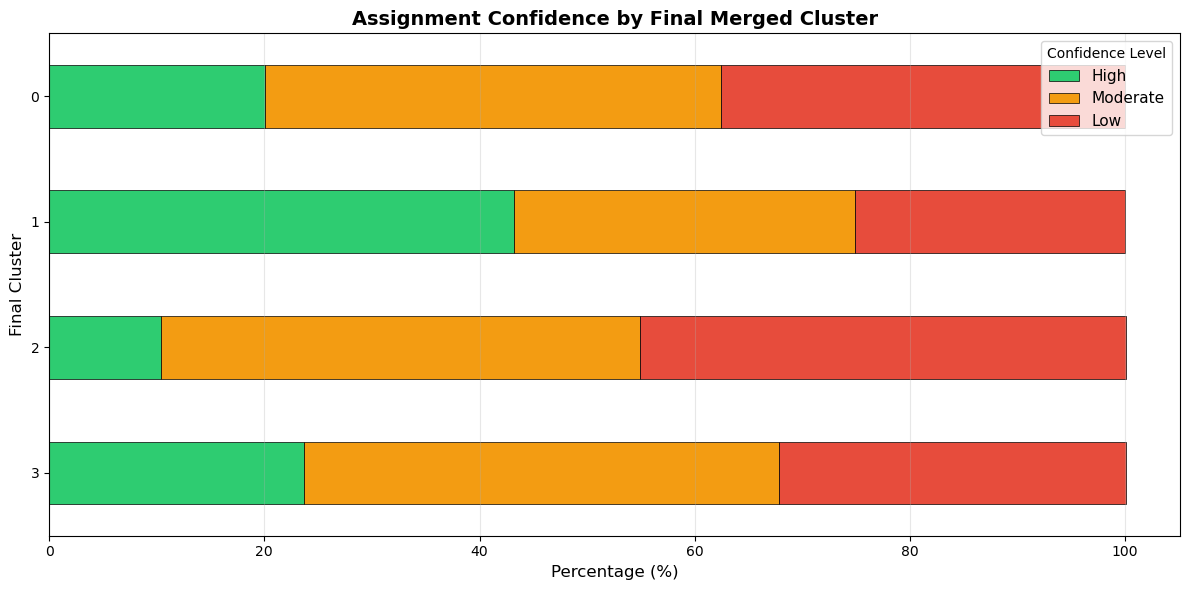

In [22]:
print("\n" + "="*60)
print("UNCERTAINTY QUANTIFICATION - FINAL MERGED CLUSTERS")
print("="*60)

# Classify customers by confidence level (based on both perspectives)
df['confidence_level'] = 'High'
df.loc[(df['fcm_membership_behavioral'] < 0.8) | (df['fcm_membership_value'] < 0.8), 'confidence_level'] = 'Moderate'
df.loc[(df['fcm_membership_behavioral'] < 0.6) | (df['fcm_membership_value'] < 0.6), 'confidence_level'] = 'Low'

# Overall distribution
confidence_overall = df['confidence_level'].value_counts()
print("\nOverall Confidence Distribution:")
for level in ['High', 'Moderate', 'Low']:
    count = confidence_overall.get(level, 0)
    pct = count / len(df) * 100
    print(f"  {level}: {count:,} ({pct:.1f}%)")

# By final merged cluster
cross_tab = pd.crosstab(df['fcm_merged_labels'], df['confidence_level'], normalize='index').mul(100).round(1)

print("\n" + "="*60)
print("Confidence Distribution by Final Cluster (%):")
print(cross_tab[['High', 'Moderate', 'Low']])

print("\n" + "="*60)
print("Strategic Recommendations by Final Cluster:")
print("="*60)

for cluster in sorted(df['fcm_merged_labels'].unique()):
    count = len(df[df['fcm_merged_labels'] == cluster])
    high_pct = cross_tab.loc[cluster, 'High']
    mod_pct = cross_tab.loc[cluster, 'Moderate']
    low_pct = cross_tab.loc[cluster, 'Low']
    
    print(f"\nFinal Cluster {cluster} ({count:,} customers):")
    print(f"  High: {high_pct:.1f}% | Moderate: {mod_pct:.1f}% | Low: {low_pct:.1f}%")

print("\n" + "="*60)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
cross_tab[['High', 'Moderate', 'Low']].plot(kind='barh', stacked=True, ax=ax,
                                             color=['#2ecc71', '#f39c12', '#e74c3c'],
                                             edgecolor='black', linewidth=0.5)
ax.set_xlabel('Percentage (%)', fontsize=12)
ax.set_ylabel('Final Cluster', fontsize=12)
ax.set_title('Assignment Confidence by Final Merged Cluster', fontsize=14, fontweight='bold')
ax.legend(title='Confidence Level', fontsize=11)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

**Uncertainty Quantification - Final Merged Clusters**

**Overall Confidence:**
- High: 4,412 (26.4%)
- Moderate: 6,706 (40.2%)
- Low: 5,569 (33.4%)

**By Final Cluster:**

**Final Cluster 0 - Mixed Active Travelers (7,355)**
- High: 20.1% | Moderate: 42.3% | Low: 37.6%
- Low confidence overall - heterogeneous mix of inactive and seasonal customers

**Final Cluster 1 - Inactive Low-Activity (4,210)**
- High: 43.2% | Moderate: 31.7% | Low: 25.1%
- **Highest confidence** - clearly defined inactive segment

**Final Cluster 2 - Ultra Value Maximizers (733)**
- High: 10.4% | Moderate: 44.5% | Low: 45.2%
- **Lowest confidence** - smallest segment with extreme characteristics creates ambiguity

**Final Cluster 3 - Seasonal Loyalty Champions (4,389)**
- High: 23.7% | Moderate: 44.1% | Low: 32.3%
- Moderate confidence - loyalty behavior creates some overlap

**Key Insights:**

**1. No High-Confidence Segments**
Only 26.4% overall have strong assignments in both perspectives. Most customers (73.6%) show moderate or low confidence.

**2. Cluster 1 Most Actionable**
43.2% high confidence makes Inactive Low-Activity segment most reliable for standard campaigns.

**3. Cluster 3 Requires Caution**
45.2% low confidence + smallest size (733) = highest uncertainty. Needs flexible strategies or may be statistical artifact.

**4. Majority Moderate (40.2%)**
Largest group requires A/B testing and quarterly monitoring rather than rigid segment strategies.

**AIAI Business Recommendations:**

**Cluster 1 (43.2% high confidence)**: Deploy automated reactivation campaigns with confidence

**Clusters 0 & 3 (~20-24% high confidence)**: Hybrid approaches, test messaging variants, monitor transitions

**Cluster 3 (10.4% high confidence)**: Personalized strategies only, avoid automated campaigns, flag for manual review

**Overall Strategy**: FCM reveals 73.6% of customers don't fit cleanly into segments. AIAI should prioritize flexible, adaptive marketing over rigid segment-based automation.

---

<h1 style="text-align: center;">End of Notebook</h1>

<p style="text-align: center; font-size: 18px;">Thank you for your time.</p>

---